In [25]:
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [26]:
def call_mouse(event, x, y, flags, params):
    global oldx, oldy
    if event == cv2.EVENT_LBUTTONDOWN:
        oldx, oldy = x, y
        
    elif event == cv2.EVENT_MOUSEMOVE:
        if flags == cv2.EVENT_FLAG_LBUTTON:
            cv2.line(img, (oldx, oldy), (x, y), (0, 0, 255),
                     10, cv2.LINE_AA)
            cv2.imshow('img', img)
            oldx, oldy = x, y

img = np.ones((600, 600, 3), np.uint8)*255

cv2.namedWindow('img')
cv2.setMouseCallback('img', call_mouse)

cv2.imshow('img', img)

while True:
    key = cv2.waitKey()
    if key == 27:
        break

    elif key == ord(' '):
        img = np.ones((600, 600, 3), np.uint8)*255
        cv2.imshow('img', img)
        
cv2.destroyAllWindows()

In [3]:
import sys

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print('Video open failed')
    sys.exit()

w = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
h = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = int(cap.get(cv2.CAP_PROP_FPS))
fourcc = cv2.VideoWriter_fourcc(*'DIVX')


out = cv2.VideoWriter('set.avi',fourcc,fps,(w,h))


while True:
    ret,frame = cap.read()

    if not ret:
        print('Frame read failed')
        break

    frame = cv2.flip(frame,0)
    cv2.imshow('img',frame)

    out.write(frame)

    if cv2.waitKey(20) == 27:
        break



cv2.destroyAllWindows()
cap.release()
out.release()




In [11]:
img = np.full((600,1200,3),(100,100,100),np.uint8)

cv2.line(img,(50,100),(300,100),(0,0,255))
cv2.arrowedLine(img,(50,100),(300,200),(0,0,255))
cv2.rectangle(img,(50,400),(300,500),(255,0,0),-1)
cv2.circle(img,(600,300),100,(123,56,44),10,cv2.LINE_AA)

cv2.ellipse(img,(600,300),(200,50),0,0,260,(255,0,0),10,cv2.LINE_AA)
cv2.putText(img,'Hello World',(600,100),cv2.FONT_HERSHEY_COMPLEX_SMALL,2,(255,255,0),1,cv2.LINE_AA)
cv2.imshow('img',img)
cv2.waitKey()
cv2.destroyAllWindows()



In [15]:
src = cv2.imread('./Ch_2_fig/fig/airplane.bmp')
mask = cv2.imread('./Ch_2_fig/fig/mask_plane.bmp')
dst = cv2.imread('./Ch_2_fig/fig/field.bmp')

cv2.copyTo(src,mask,dst)

cv2.imshow('src',src)
cv2.imshow('mask',mask)
cv2.imshow('dst',dst)

cv2.waitKey()
cv2.destroyAllWindows()


In [35]:
img = cv2.imread('./Ch_2_fig/fig/cat.bmp')
h,w = img.shape[:2]
img_resize = cv2.resize(img,(w*2,h*2),interpolation=cv2.INTER_AREA)

cv2.imwrite('./Ch_2_fig/fig/mag_2.png',img_resize)
cv2.imshow('img',img_resize)
cv2.waitKey()
cv2.destroyAllWindows()


In [33]:
def call_track(pos):
    img[:] = img_1*(pos/255)
    cv2.imshow('img', img)

## trackbar
img = cv2.imread('./Ch_2_fig/fig/puppy.bmp', 0)
img_1 = img.copy()

# createTrackbar(trackbarName, windowName, value, count, onChange) -> None
# trackbarName: 트랙바 이름
# windowName : 트랙바를 생성할 창 이름
# value : 트랙바 위치 초기값
# count : 트랙바 최댓값, 최솟값은 0
# onChange :callback 함수 e.g., onChange(pos) 위치를 정수형태로 전달

cv2.imshow('img', img)
cv2.createTrackbar('level', 'img', 0, 255, call_track)


cv2.waitKey()
cv2.destroyAllWindows()

In [38]:
import time

img = cv2.imread('./Ch_2_fig/fig/puppy.bmp', 0)

t1 = time.time()
# GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
img_1 = cv2.GaussianBlur(img, (0, 0), 3)
t2 = time.time()

cv2.imshow('img', img)
cv2.imshow('img_1', img_1)

cv2.waitKey()
cv2.destroyAllWindows()

print((t2-t1)*1000, 'ms')

1.9943714141845703 ms


In [39]:
## 
src = cv2.imread('./fig/fig/lenna256.bmp')


# dst = np.clip(src + 100., 0, 255).astype(np.uint8)
dst = cv2.add(src, (100, 100, 100, 0))

print(dst.dtype)
cv2.imshow('src', src)
cv2.imshow('dst', dst)


cv2.waitKey()
cv2.destroyAllWindows()

uint8


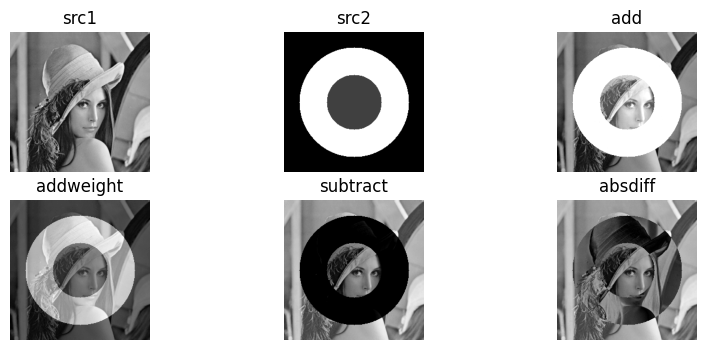

In [41]:
src1 = cv2.imread('./fig/fig/lenna256.bmp',0)
src2 = np.zeros_like(src1)
cv2.circle(src2, (128, 128), 100, 200, -1)
cv2.circle(src2, (128, 128), 50, 50, -1)

dst1 = cv2.add(src1, src2)
dst2 = cv2.addWeighted(src1, 0.5, src2, 0.5, 0)
dst3 = cv2.subtract(src1, src2)
dst4 = cv2.absdiff(src1, src2)

fig, ax = plt.subplots(2, 3, figsize = (10, 4))

ax[0, 0].imshow(src1, cmap='gray'), ax[0, 0].axis('off'), ax[0, 0].set_title('src1')
ax[0, 1].imshow(src2, cmap='gray'), ax[0, 1].axis('off'), ax[0, 1].set_title('src2')
ax[0, 2].imshow(dst1, cmap='gray'), ax[0, 2].axis('off'), ax[0, 2].set_title('add')
ax[1, 0].imshow(dst2, cmap='gray'), ax[1, 0].axis('off'), ax[1, 0].set_title('addweight')
ax[1, 1].imshow(dst3, cmap='gray'), ax[1, 1].axis('off'), ax[1, 1].set_title('subtract')
ax[1, 2].imshow(dst4, cmap='gray'), ax[1, 2].axis('off'), ax[1, 2].set_title('absdiff')
plt.show()

# cv2.imshow('src1', src1)
# cv2.imshow('src2', src2)
# cv2.imshow('dst1', dst1)
# cv2.imshow('dst2', dst2)
# cv2.imshow('dst3', dst3)
# cv2.imshow('dst4', dst4)

# cv2.waitKey()
# cv2.destroyAllWindows()

In [3]:
src = cv2.imread('./Ch_2_fig/fig/rudolf.png')
alpha = cv2.imread('./Ch_2_fig/fig/imgbin_hat.png',cv2.IMREAD_UNCHANGED)
alpha= cv2.resize(alpha,(330,500),interpolation=cv2.INTER_AREA)

sunglass = alpha[:,:,0:-1]
mask = alpha[:,:,-1]


src_crop = src[200:200+500,350:350+330] # 시작점 끝점

print('src shape',src.shape)
print('alpha shape',alpha.shape)

cv2.copyTo(sunglass,mask,src_crop)

src_crop[mask>0]=(0,0,0)

cv2.imshow('src',src)
# (x,y,w,h) = cv2.selectROI('src')
cv2.imshow('src_crop',src_crop)

cv2.imshow('alpha',alpha)
cv2.imshow('mask',mask)

print('src.shape',src.shape)
print('alpha.shape',alpha.shape)
cv2.imwrite('./Ch_2_fig/fig/sunglass.png',src)

cv2.waitKey()
cv2.destroyAllWindows()

src shape (1000, 1000, 3)
alpha shape (500, 330, 4)
src.shape (1000, 1000, 3)
alpha.shape (500, 330, 4)


In [42]:
src = cv2.imread('./Ch_2_fig/fig/rudolf.png')
dst = cv2.imread('./Ch_2_fig/fig/sunglass.png')
h,w=dst.shape[:2]
src = cv2.resize(src,(w,h),interpolation=cv2.INTER_AREA)

for i in range(100):
    alpha = i*0.01
    dst1 = cv2.addWeighted(src,1-alpha,dst,alpha,0)
    cv2.imshow('img',dst1)

    if cv2.waitKey(50) == 27:
        break

cv2.waitKey()
cv2.destroyAllWindows()

In [15]:
src = cv2.imread('./fig/fig/flowers.jpg')
src_hsv = cv2.cvtColor(src,cv2.COLOR_BGR2HSV)
b,g,r = cv2.split(src)
h,s,v = cv2.split(src_hsv)
# blue = src[:,:,0]
# green = src[:,:,1]
# red = src[:,:,2]

b_add = b+50

dst=cv2.merge((b_add,g,r))

cv2.imshow('img',src)
cv2.imshow('dst',dst)
cv2.imshow('b',b)
cv2.imshow('g',g)
cv2.imshow('r',r)
cv2.imshow('h',h)
cv2.imshow('s',s)
cv2.imshow('v',v)



cv2.waitKey()
cv2.destroyAllWindows()

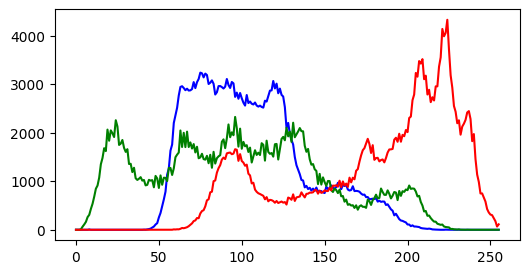

In [24]:
src = cv2.imread('./fig/fig/lenna.bmp',1)

# cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]]) -> hist
# images: 입력영상 리스트(리스트로 입력)
# channels: 채널리스트, 3 채널의 경우 [0,1,2]
# mask: 마스크 영상입력, 영상전체는 None으로 지정
# histSize: 히스터그램 빈의 크기
# range: 히스토그램의 최솟값과 최댓값
# hist: 계산된 히스토그램, numpy.ndarray 타입
# accumulate: 기존의 히스토그램을 누적할경우 True

hist_b = cv2.calcHist([src],[0],None,[256],[0,256])
hist_g = cv2.calcHist([src],[1],None,[256],[0,256])
hist_r = cv2.calcHist([src],[2],None,[256],[0,256])

cv2.imshow('src',src)
cv2.waitKey()
cv2.destroyAllWindows()

plt.figure(figsize=(6,3))
plt.plot(hist_b,'b')
plt.plot(hist_g,'g')
plt.plot(hist_r,'r')
plt.show()